# [ LG에너지솔루션_DX ] 변수선택 및 차원 축소 (1)

## 변수선택: 전진선택, 후방소거, 단계적 선택법, 유전 알고리즘

### 강의 복습
강의자료 : 변수선택 및 차원 축소 | 전진선택, 후방소거, 단계적 선택법, 유전 알고리즘

- 전진 선택법 : 설명변수가 하나도 없는 모델에서부터 시작하여 가장 유의미한 변수를 하나씩 추가해 나가는 방법
- 후방 소거법 : 모든 변수를 사용하여 구축한 모델에서 유의미하지 않은 변수를 하나씩 제거해 나가는 방법
- 단계적 선택법 : 전진 선택법과 후진 소거법을 번갈아 가면서 수행하는 변수 선택 기법
- 유전 알고리즘 : 진화 알고리즘의 한 종류로 세대(반복)를 거듭할수록 좋은 유전자(변수)들이 선택되도록 하는 방법

### 실습 요약
1. 본 실습에서는 전진선택, 후방소거, 단계적 선택법, 유전 알고리즘을 통해 변수를 선택하여 차원 축소를 진행합니다.
2. 분류 과업을 위해 로지스틱 모델을 통해 각 선택법에 따른 성능 차이를 확인합니다.

### 데이터 준비하기


금일 실습에서는 Personal Loan 데이터셋을 사용합니다.
- 고객 정보(나이, 학력, 성별 등)를 이용하여 개인 대출 여부(개인 대출 받음 = 1, 그 외 = 0)를 예측함
- 데이터 설명 링크: [바로가기](https://www.kaggle.com/datasets/teertha/personal-loan-modeling)


전처리 진행
- 불필요한 변수 삭제: ID, ZIP Code
- 예측변수 분리: Personal Loan

In [ ]:
# 경고 메세지 미출력 처리
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd  # 데이터 조작 및 분석을 위한 모듈
ploan = pd.read_csv("Personal Loan.csv")
display(ploan)

# 활용할 입력변수 골라내기
ploan_data = ploan.drop(['ID','ZIP Code'],axis='columns')
display(ploan_data)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,46,22,70,94701,4,1.9,1,212,0,0,0,0,1
2496,2497,63,37,32,93117,3,0.7,2,141,0,0,0,0,0
2497,2498,33,9,14,95133,3,0.9,3,114,0,0,0,0,0
2498,2499,38,14,111,92028,2,6.1,1,326,0,0,0,0,0


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,38,14,111,2,6.1,1,326,0,0,0,0,0


### 데이터셋 분리
* 첫 1,500개 샘플을 학습용, 나머지 샘플을 검증용으로 구분

In [ ]:
ploan_trn = ploan_data.iloc[:1500,:]
ploan_tst = ploan_data.iloc[1500:,:]

x_trn, y_trn = ploan_trn.drop(['Personal Loan'],axis='columns'), ploan_trn['Personal Loan']
x_tst, y_tst = ploan_tst.drop(['Personal Loan'],axis='columns'), ploan_tst['Personal Loan']

# feature names
feature_names = list(x_trn.columns)

### 분류 문제 평가 지표 산출 함수 작성

* Confusion Matrix ( 출처: [https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning](https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning) )

  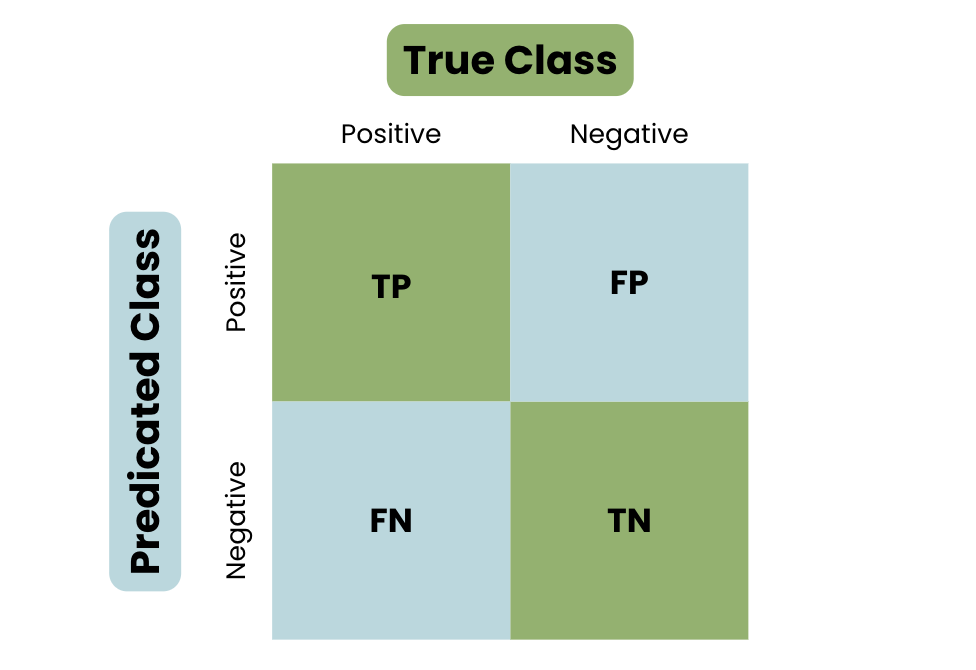
<br>


* 평가지표  
    **sklearn.metrics에 이미 존재하는 지표도 있으나 실습 차원에서 직접 지표 계산**
    
  * Recall(True Positive Rate, TPR) $=\frac{TP}{FN+TP}$
  * Precision $=\frac{TP}{FP+TP}$  
  * TNR(True Negative Rate) $= \frac{TN}{FP+TN}$  
  * Accuracy $= \frac{TP+TN}{TN+FP+FN+TP}$  
  * BCR(Balanced Correction Rate) $= \sqrt{\frac{TP}{FN+TP} \cdot \frac{TN}{FP+TN}}$  
  * F1 $= \frac{2 \cdot Recall \cdot Precision}{Recall+Precision}$  


In [ ]:
from typing import Union
import numpy as np
from sklearn.metrics import confusion_matrix


def perf_eval_clf(y_true: Union[np.ndarray,list], y_pred: Union[np.ndarray,list])->list:
    """
    Input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)

    Return:
    [TPR,Precision,TNR, Accuracy, BCR, F1]: scores of classification in a list
    """
    cm = confusion_matrix(y_true = y_true, y_pred = y_pred)

    print(f"Confusion Matrix:\n{cm.T}")
    tp, fp, fn, tn = np.flip(cm).ravel()

    TPR = round(tp/(tp+fn),3)
    PRE = round(tp/(tp+fp),3)
    TNR = round(tn/(fp+tn),3)
    ACC = round((tp+tn)/(tn+fp+fn+tp),3)
    BCR = round(np.sqrt([TPR*TNR])[0],3)
    F1 = round(2*TPR*PRE/(TPR+PRE),3)


    return [TPR,PRE,TNR,ACC,BCR,F1]

### 결과 표 작성
  
* Dictionary로 결과를 저장하고 결과 확인 시 DataFrame으로 출력  
* Personla Loan 데이터 셋에 대한 Logistic Regression 모델 기반 변수 선택볍 별 결과 비교

In [ ]:
import pandas as pd

def display_result(result_dict: dict, metric_names: list = ['TPR(Recall)','Precision','TNR','ACC','BCR','F1']):
    """
    Input:
    result_dict : 데이터 셋 별 classification 평가 결과 저장한 dictionary
    ex) {'Personal Loan':[0.1,0.5,0.3],...}


    metric_names : Classification 평가 지표 이름 List
    ex) ['TPR(Recall)','Precision','TNR','ACC','BCR','F1']
    """
    result_df = pd.DataFrame(result_dict).T
    result_df.index = list(result_dict.keys())
    result_df.columns = metric_names

    display(result_df)

result_dict= {}

### Logistic Regression
* scikit-learn의 모델 활용  
* 주요 parameters  
    * fit_intercept: 상수항 추가 여부 (default: True)  
    * solver: 최적의 해를 구하기 위한 알고리즘 선택 / 모든 penalty 종류에 적합한 'saga' 선택  
    * max_iter: solver가 수렴하기 위한 최대 시도 횟수  
    * n_jobs: 사용 되는 CPU 개수 / -1 : 모든 CPU 활용  
    * random_state: 'saga'를 solver에서 선택한 경우 지정해주어야 함
    * l1_ratio: Elastic Net 형성시 l1 penatly의 가중치([0,1]사이의 값이어야 함)  
    if) l1_ratio=0 : penalty='l2' , l1_ratio=1 : penalty:'l1'<br>
    <br>
* logit_pvalue 함수 이용하여 각 변수의 통계적 유의성 확인(*code Implemented from [[Here](https://pythonguides.com/scikit-learn-logistic-regression/)])

* 변수 선택 알고리즘이 적용된 모델의 결과 비교 실시  
    ```
    (1) 모든 변수(All Variables)  
    (2) Forward Selection  
    (3) stepwise Elimination  
    (4) Stepwise Selection  
    (5) Genetic Algorithm  

    ```  

#### 1) All Variables

In [ ]:
from sklearn.linear_model import LogisticRegression
seed = 1234
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':1000,
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
# Saving name of the selected features
features_dict = {}
features_dict['All Variables'] = feature_names # all Variables

full_model = LogisticRegression(**full_config).fit(x_trn,y_trn)

y_pred = full_model.predict(x_tst)
result_dict['All Variables'] = perf_eval_clf(y_tst,y_pred)
display_result(result_dict)


Confusion Matrix:
[[ 53  51]
 [ 29 867]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.646,0.51,0.944,0.92,0.781,0.57


#### 2) Forward Selection

* scikit-learn의 SequentialFeatureSelector 활용 [[Link]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)

* 주요 Parameters
    * estimator: scikit-learnd의 model / 1)의 Logisitic regression 활용
    * n_features: 선택되는 변수의 수 / 'auto'로 설정하면 자동으로 변수 선택 됨 / 특정 숫자(정수)로 지정 가능  
    * tol: 변수의 선택/제거 후의 모델의 성능과 이전 시점의 모델과의 성능이 최소 tol 만큼 차이가 존재할 시 변수의 선택/제거가 실시됨 / n_features 가 'auto'일 때 설정이 필요함
    * **direction: 'forward'=Forward Selection / 'backward'=Backward Elimination 진행**
    * scoring: 모델의 성능 평가 지표 / 분류 과업일 시 'f1'으로 설정하는 것이 일반적
    * cv: Cross-validation을 실시할 때의 fold 개수 / 아무 값도 입력하지 않을 시 5-fold로 진행 됨 <br>
<br>

* SequentialFeatureSelector.fit() 활용하여 변수 선택 후, 선택된 변수로 Logistic Regression 학습 진행

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# SequentialFeatureSelector 학습
seed = 1234
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':1000,
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
full_model = LogisticRegression(**full_config)

forward_config = {
    'estimator':full_model,
    'n_features_to_select':'auto',
    'tol':1e-4,
    'direction':'forward',
    'scoring':'f1',
    'cv':5,
    'n_jobs':-1
}

forward_selection = SFS(**forward_config).fit(x_trn,y_trn)
features_dict['Forward Selection'] = forward_features = forward_selection.get_feature_names_out()

print(forward_features)

['Age' 'Experience' 'Income' 'Family' 'Education' 'Online']


In [ ]:
# Training Logistic Regression with selected features

x_trn_forward = x_trn[forward_features]
x_tst_forward = x_tst[forward_features]
forward_logit = LogisticRegression(**full_config).fit(x_trn_forward,y_trn)

y_pred = forward_logit.predict(x_tst_forward)
result_dict['Forward Selection'] = perf_eval_clf(y_tst,y_pred)
display_result(result_dict)

Confusion Matrix:
[[ 58  46]
 [ 19 877]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.646,0.510,0.944,0.920,0.781,0.570
Forward Selection,0.753,0.558,0.950,0.935,0.846,0.641


#### 3) Backward Elimination

In [ ]:
# SequentialFeatureSelector 학습
seed=1234
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':1000,
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
full_model = LogisticRegression(**full_config)

backward_config = {
    'estimator':full_model,
    'n_features_to_select':'auto',
    'tol':1e-4,
    'direction':'backward',
    'scoring':'f1',
    'cv':5,
    'n_jobs':-1
}

backward_eliminaion = SFS(**backward_config).fit(x_trn,y_trn)
features_dict['Backward Elimination'] = backward_features = backward_eliminaion.get_feature_names_out()
print(backward_features)

['Age' 'Experience' 'Income' 'Family' 'Education' 'Online']


In [ ]:
# Training Logistic Regression with selected features

x_trn_backward = x_trn[backward_features]
x_tst_backward = x_tst[backward_features]
backward_logit = LogisticRegression(**full_config).fit(x_trn_backward,y_trn)

y_pred = backward_logit.predict(x_tst_backward)
result_dict['Backward Elimination'] = perf_eval_clf(y_tst,y_pred)
display_result(result_dict)

Confusion Matrix:
[[ 58  46]
 [ 19 877]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.646,0.510,0.944,0.920,0.781,0.570
Forward Selection,0.753,0.558,0.950,0.935,0.846,0.641
Backward Elimination,0.753,0.558,0.950,0.935,0.846,0.641


#### 4) Stepwise Selection

* scikit-learn의 SequentialFeatureSelector의 parameter 중 ```direction='forward', tol=None```으로 설정할 시 Stepwise Selection의 알고리즘을 따르게 됨


In [ ]:
from sklearn.base import BaseEstimator, clone
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import cross_val_score
class Stepwise(BaseEstimator):
    def __init__(self, **kwargs) -> None:
        self.kwargs = kwargs
        print(f"Task:{self.kwargs['task']}")

    def fit(
        self,
        X: pd.DataFrame,
        y: Union[
            pd.Series,
            np.ndarray,
        ],
    ):
        self.feature_names = X.columns.to_numpy()
        n_features = X.shape[1]  # 전체 변수 개수
        current_mask = np.zeros(shape=n_features, dtype=bool)  # 모든 원소 다 False
        feature_idx_dict = {feature: idx for idx, feature in enumerate(X.columns)}
        n_iterations = n_features - 1
        backward_temp_idx = np.inf
        if self.kwargs['task']=='regression':
          old_score = np.inf
        elif self.kwargs['task']=='classification':
          old_score = -np.inf
        cloned_estimator = clone(self.kwargs["estimator"])
        self.kwargs.update({"estimator": cloned_estimator})

        for i in range(n_iterations):
            # forward 진행

            print(f"\nForward")
            forward_feature_idx, new_forward_score = self._get_best_new_feature_score(
                X,
                y,
                current_mask=current_mask,
                direction="forward",
                **self.kwargs,
            )

            forward_stop_condition = self._set_condition(
                new_forward_score, old_score, self.kwargs["tol"], self.kwargs['task']
            )
            if old_score < new_forward_score:
                  old_score = new_forward_score
            if forward_stop_condition or ((i+1>=4)&(forward_feature_idx==backward_temp_idx)):
                break

            current_mask[forward_feature_idx] = True  # 선택된 변수들의 위치에 True 값

            print(f"forward result: {np.where(current_mask)[0]}")

            if i + 1 >= 3:
                # backward 진행
                print(f"\nBackward")
                backward_init_indices = np.where(current_mask)[0]  # 선택된 변수의 indices 반환

                (
                    backward_temp_idx, # 제거해야 할 index
                    new_backward_score,
                ) = self._get_best_new_feature_score(
                    X,
                    y,
                    current_mask=current_mask,
                    direction="backward",
                    **self.kwargs,
                )

                print(f"old score: {old_score} | new backward score: {new_backward_score}")

                if old_score < new_backward_score:
                  old_score = new_backward_score
                  if forward_feature_idx != backward_temp_idx:  # backward 단독 및 stepwise 전체 차원의 조건 확인
                    current_mask[backward_temp_idx] = False

                else:
                  print(f"Repeat the forward selection again\n")


            else:
              old_score = new_forward_score

        self.support_ = current_mask
        self.n_features_to_select_ = self.support_.sum()

        return self

    def _set_condition(self, new_score, old_score, tol, task):
        # Error는 작게해야하므로
        print(f"old score: {old_score} | new score: {new_score}")
        if task == 'regression':
          return old_score - new_score < tol
        elif task == 'classification':
          return old_score - new_score > tol

    def _get_best_new_feature_score(
        self, X, y, current_mask, direction, estimator, cv, scoring, n_jobs, tol=None, task = None
    ):
        # Implemented from scikit-learn official source
        # (https://github.com/scikit-learn/scikit-learn/blob/3f89022fa/sklearn/feature_selection/_sequential.py#L17)
        # Return the best new feature and its score to add to the current_mask,
        # i.e. return the best new feature and its score to add (resp. remove)
        # when doing forward selection (resp. backward selection).
        # Feature will be added if the current score and past score are greater
        # than tol when n_feature is auto,


        if direction=='forward':
          candidate_feature_indices = np.flatnonzero(~current_mask) # 현재 선택되지 않은 변수들의 index

        elif direction=='backward':
          candidate_feature_indices = np.flatnonzero(current_mask) # 현재 선택된 변수들의 index

        print(f"direction:{direction} | candidates: {candidate_feature_indices}")
        scores = {}
        for feature_idx in candidate_feature_indices:
            candidate_mask = current_mask.copy()
            if direction == "forward":
              candidate_mask[feature_idx] = True

            elif direction == "backward":
                candidate_mask[feature_idx] = False
            candidate_idx = np.flatnonzero(candidate_mask)
            print(f"on-going candidate: {candidate_idx}")

            X_new = X.iloc[:, candidate_idx]
            scores[feature_idx] = cross_val_score(
                estimator,
                X_new,
                y,
                cv=cv,
                scoring=scoring,
                n_jobs=n_jobs,
            ).mean()
        print(f"scores:{scores}")
        new_feature_idx = max(scores, key=lambda feature_idx: scores[feature_idx])
        print(f"direction:{direction} | add/delete feature_idx:{new_feature_idx}")
        return new_feature_idx, scores[new_feature_idx]

    def get_params(self):
        return self.kwargs

    def get_support(self):
        check_is_fitted(self)
        return self.support_

    def get_feature_names_out(self):
      check_is_fitted(self)
      return self.feature_names[self.get_support()].tolist()

In [ ]:
# SequentialFeatureSelector 학습
seed=1234
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':1000,
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
full_model = LogisticRegression(**full_config)

stepwise_config = {
    'estimator':full_model,
    'tol':1e-4,
    'scoring':'f1',
    'cv':5,
    'n_jobs':-1,
    'task': 'classification'
}

stepwise_selection = Stepwise(**stepwise_config).fit(x_trn,y_trn)
features_dict['Stepwise Selection']= stepwise_features = stepwise_selection.get_feature_names_out()
print(stepwise_features)

Task:classification

Forward
direction:forward | candidates: [ 0  1  2  3  4  5  6  7  8  9 10]
on-going candidate: [0]
on-going candidate: [1]
on-going candidate: [2]
on-going candidate: [3]
on-going candidate: [4]
on-going candidate: [5]
on-going candidate: [6]
on-going candidate: [7]
on-going candidate: [8]
on-going candidate: [9]
on-going candidate: [10]
scores:{0: 0.0, 1: 0.0, 2: 0.11806543385490753, 3: 0.0, 4: 0.07080872913992298, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.10984615384615386, 9: 0.0, 10: 0.0}
direction:forward | add/delete feature_idx:2
old score: -inf | new score: 0.11806543385490753
forward result: [2]

Forward
direction:forward | candidates: [ 0  1  3  4  5  6  7  8  9 10]
on-going candidate: [0 2]
on-going candidate: [1 2]
on-going candidate: [2 3]
on-going candidate: [2 4]
on-going candidate: [2 5]
on-going candidate: [2 6]
on-going candidate: [2 7]
on-going candidate: [2 8]
on-going candidate: [2 9]
on-going candidate: [ 2 10]
scores:{0: 0.2861123908818585, 1: 0.190558213

In [ ]:
# Training Logistic Regression with selected features

x_trn_stepwise = x_trn[stepwise_features]
x_tst_stepwise = x_tst[stepwise_features]
stepwise_logit = LogisticRegression(**full_config).fit(x_trn_stepwise,y_trn)

y_pred = stepwise_logit.predict(x_tst_stepwise)
result_dict['Stepwise Selection'] = perf_eval_clf(y_tst,y_pred)
display_result(result_dict)

Confusion Matrix:
[[ 58  46]
 [ 19 877]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.646,0.510,0.944,0.920,0.781,0.570
Forward Selection,0.753,0.558,0.950,0.935,0.846,0.641
Backward Elimination,0.753,0.558,0.950,0.935,0.846,0.641
Stepwise Selection,0.753,0.558,0.950,0.935,0.846,0.641


#### 5) Genetic Algorithm

* 코드 출처 [[Here](https://www.kaggle.com/code/tanmayunhale/genetic-algorithm-for-feature-selection)]
* GeneticAlgorithm 클래스 내 함수
    * initialization_of_population: Population을 초기화 함
    * fitness_scores: 후보 부모 염색체 별 점수 (분류 과업 진행 시 f1-score 활용)
    * selection: 최고 점수의 부모 염색체 선택
    * crossover: 선택된 부모 염색체의 각 유전자들 중 일부를 교차함
    * mutation: Crossover 된 자식 염색체 중 일부 유전자 변경
    * fit: 모든 과정을 특정 수의 세대/반복(iteration)을 거쳐 학습 시킴

  ![Genetic Algorithm](https://miro.medium.com/max/598/1*TZ840m0DvghL80GodVGLeQ.png)

In [ ]:
from itertools import combinations
from typing import Union
from sklearn.metrics import f1_score

class GeneticAlgorithm(object):
    def __init__(self,
    population_size: int,
    n_feat: int,
    n_parents: Union[int,float],
    n_gen: int,
    init_rate: float,
    mutation_rate:float,
    crossover_rate:float,
    model:object,
    seed: int

    ) -> None:
        """
        population_size: (int) size of population, 전체 염색체 개수 = 변수 조합의 개수
        n_feat: (int) number of total features, 전체 변수 개수
        n_parents: (int) number of parents chromosomes , 선택되는 부모 염색체 개수
        n_gen: (int) number of generations, 세대 또는 반복 수
        init_rate: (float) fraction of non-selected features, 선택되지 않는 변수의 개수
        mutation_rate: (float) probability of generating mutation, 돌연변이의 비율
        crossover_rate: (float) probability of doing cross over on each variable, 각 변수가 cross over 될 확률
        model: classification/regression models of sckit-learn
        seed: (int) set the randomness

        """
        self.population_size = population_size
        self.n_feat = n_feat
        self.n_parents = n_parents
        self.n_gen = n_gen
        self.init_rate = init_rate
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.model = model
        self.seed = seed

    def initialization_of_population(self,size: int, n_feat: int, init_prob: float)->list:
        population = []
        for i in range(size):
            chromosome = np.zeros(n_feat,dtype=bool)
            chromosome[:int(init_prob*n_feat)]=True
            np.random.shuffle(chromosome) # 선택되는 feature의 비율을 정한 후 무작위로 선택
            population.append(chromosome)

        return population


    def fitness_score(self, model, population:list, X_train:Union[np.array,pd.DataFrame],Y_train:Union[np.array,pd.DataFrame]):
        scores = []
        for chromosome in population:
            model.fit(X_train.iloc[:,chromosome],Y_train)
            predictions = model.predict(X_train.iloc[:,chromosome])
            scores.append(f1_score(Y_train,predictions))
        scores, population = np.array(scores), np.array(population)
        inds = np.argsort(scores)
        return list(scores[inds][::-1]), list(population[inds,:][::-1])

    def selection(self,pop_after_fit,n_parents):
      if isinstance(n_parents,float):
        n_parents = int(n_parents*self.population_size)
      pop_after_sel = []
      for i in range(n_parents):
          pop_after_sel.append(pop_after_fit[i])

      print(f"pop_after_sel: {pop_after_sel}")

      return pop_after_sel

    def crossover(self,pop_after_sel:list,crossover_rate:float):
        # np.random.seed(seed)
        parent_combinations = list(combinations(np.arange(len(pop_after_sel)),2))
        pop_after_cross = []

        if len(pop_after_sel)==2: # 부모의 개수가 2개일 때
          i,j = parent_combinations[0]
          new_child1,new_child2 = [],[]
          child_1 , child_2 = pop_after_sel[i] , pop_after_sel[j]
          select_idx = np.random.random_sample(len(child_1)) > crossover_rate
          for k in range(len(child_1)):
              new_child1.append(child_1[k] if select_idx[k] else child_2[k])
              new_child2.append(child_2[k] if select_idx[k] else child_1[k])
          pop_after_cross.append(new_child1)
          pop_after_cross.append(new_child2)

        elif len(pop_after_sel)>2: # 부모의 개수가 3개 이상일 때
          chosen_idxs = np.random.choice(len(parent_combinations),
                                        size=len(pop_after_sel),
                                        replace=False)

          for t in chosen_idxs:
            new_child = []
            i,j = np.array(parent_combinations)[t]
            child_1 , child_2 = pop_after_sel[i] , pop_after_sel[j]
            select_idx = np.random.random_sample(len(child_1)) > crossover_rate
            for k in range(len(child_1)):
                new_child.append(child_1[k] if select_idx[k] else child_2[k])
            pop_after_cross.append(new_child)

        return pop_after_cross

    def mutation(self, pop_after_cross:list, mutation_rate:float, n_feat:int):
        mutation_range = int(mutation_rate*n_feat)
        pop_next_gen = []
        for n in range(0,len(pop_after_cross)):
            chromo = pop_after_cross[n]
            rand_posi = []
            for i in range(0,mutation_range):
                pos = np.random.randint(0,n_feat-1)
                rand_posi.append(pos)
            for j in rand_posi:
                chromo[j] = not chromo[j]
            pop_next_gen.append(chromo)
        return pop_next_gen

    def fit(self,
            x_trn:Union[np.array, pd.DataFrame],
            y_trn:Union[np.array, pd.Series,list,],):

        np.random.seed(self.seed)
        best_chromo= []
        best_score= []
        population_nextgen = self.initialization_of_population(self.population_size, self.n_feat, self.init_rate)
        for i in range(self.n_gen +1):
            scores, pop_after_fit = self.fitness_score(
                self.model,
                population_nextgen,
                x_trn, y_trn
                )
            print('\nBest score(Training) in generation',i,':',scores[:1])  #2
            pop_after_sel = self.selection(pop_after_fit,self.n_parents)
            pop_after_cross = self.crossover(pop_after_sel,self.crossover_rate)
            population_nextgen = self.mutation(pop_after_cross, self.mutation_rate, self.n_feat)
            best_chromo.append(pop_after_fit[0])
            best_score.append(scores[0])
        return best_chromo, best_score

In [ ]:
seed=1234
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':1000,
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
full_model = LogisticRegression(**full_config)

genetic_config={
    'population_size':20, # 전체 20가지의 변수 조합에 대해 살펴봄
    'n_feat':max_features, # 각 염색체의 길이는 전체 변수의 개수(본 예제: 11개)
    'n_parents':4, # 선택되는 부모 염색체 수
    'n_gen':5, # 다섯 번의 반복 진행할 것
    'init_rate':0.5, # 첫 세대의 염색체들은 11개 중 50%에 해당하는 약 6개의 변수들을 사용하는 조합으로 구성되어 있음
    'mutation_rate':0.1, # 돌연변이 부여 비율
    'crossover_rate':0.3, # 부모 염색체의 유전자 간의 cross over 비율
    'model':full_model,
    'seed':seed
}

GA = GeneticAlgorithm(**genetic_config)
bestchromo,bestscores = GA.fit(x_trn,y_trn)
features_dict['Genetic Algorithm'] = genetic_features = np.array(feature_names)[bestchromo[np.argmax(bestscores)]].tolist()
print(genetic_features)


Best score(Training) in generation 0 : [0.6209677419354839]
pop_after_sel: [array([ True,  True,  True, False,  True,  True, False, False, False,
       False, False]), array([ True,  True,  True, False, False, False, False, False,  True,
       False,  True]), array([False,  True, False, False,  True,  True, False, False,  True,
       False,  True]), array([ True, False,  True, False,  True, False, False, False,  True,
        True, False])]

Best score(Training) in generation 1 : [0.6973180076628352]
pop_after_sel: [array([ True,  True,  True,  True,  True,  True, False, False,  True,
       False, False]), array([ True,  True,  True, False,  True, False, False, False,  True,
       False,  True]), array([ True, False,  True, False,  True, False, False, False,  True,
       False, False]), array([False,  True,  True, False,  True, False, False, False,  True,
       False,  True])]

Best score(Training) in generation 2 : [0.6614173228346457]
pop_after_sel: [array([ True,  True,  Tru

In [ ]:
# Training Logistic Regression with selected features

x_trn_genetic = x_trn[genetic_features]
x_tst_genetic = x_tst[genetic_features]
genetic_logit = LogisticRegression(**full_config).fit(x_trn_genetic,y_trn)

y_pred = genetic_logit.predict(x_tst_genetic)
result_dict['Genetic Algorithm'] = perf_eval_clf(y_tst,y_pred)
display_result(result_dict)

Confusion Matrix:
[[ 59  45]
 [ 19 877]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.646,0.510,0.944,0.920,0.781,0.570
Forward Selection,0.753,0.558,0.950,0.935,0.846,0.641
Backward Elimination,0.753,0.558,0.950,0.935,0.846,0.641
Stepwise Selection,0.753,0.558,0.950,0.935,0.846,0.641
Genetic Algorithm,0.756,0.567,0.951,0.936,0.848,0.648


In [ ]:
from collections import defaultdict
final_chosen_features = dict()
for key, value in features_dict.items():
  result = {feature:"O" if feature in value else "X" for feature in feature_names}
  final_chosen_features.update({key:result})

display(pd.DataFrame(final_chosen_features).T)



,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
All Variables,O,O,O,O,O,O,O,O,O,O,O
Forward Selection,O,O,O,O,X,O,X,X,X,O,X
Backward Elimination,O,O,O,O,X,O,X,X,X,O,X
Stepwise Selection,O,O,O,O,X,O,X,X,X,O,X
Genetic Algorithm,O,O,O,O,O,O,X,X,O,X,X


# EOD